In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("C:/Users/User/Desktop/PROJECTS/Credit risk/loans_full_schema.csv")

In [3]:
df.head()

,Unnamed: 0,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,1,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,2,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,3,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,4,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,5,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        10000 non-null  int64  
 1   emp_title                         9167 non-null   object 
 2   emp_length                        9183 non-null   float64
 3   state                             10000 non-null  object 
 4   homeownership                     10000 non-null  object 
 5   annual_income                     10000 non-null  float64
 6   verified_income                   10000 non-null  object 
 7   debt_to_income                    9976 non-null   float64
 8   annual_income_joint               1495 non-null   float64
 9   verification_income_joint         1455 non-null   object 
 10  debt_to_income_joint              1495 non-null   float64
 11  delinq_2y                         10000 non-null  int64  
 12  month

In [5]:
df.isnull()

,Unnamed: 0,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.nunique()

Unnamed: 0                          10000
emp_title                            4741
emp_length                             11
state                                  50
homeownership                           3
annual_income                        1463
verified_income                         3
debt_to_income                       3673
annual_income_joint                   596
verification_income_joint               3
debt_to_income_joint                 1189
delinq_2y                              12
months_since_last_delinq               97
earliest_credit_line                   53
inquiries_last_12m                     26
total_credit_lines                     78
open_credit_lines                      45
total_credit_limit                   9119
total_credit_utilized                9497
num_collections_last_12m                4
num_historical_failed_to_pay            9
months_since_90d_late                 106
current_accounts_delinq                 2
total_collection_amount_ever      

In [7]:
df.dropna(thresh=df.shape[0]*0.5,axis =1, inplace=True)

In [8]:
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

In [9]:
df_numeric = df.select_dtypes(include=['number'])
df[df_numeric.columns] = df_numeric.fillna(df_numeric.mean())

In [10]:
df_categorical = df.select_dtypes(exclude=['number'])
df[df_categorical.columns] = df_categorical.fillna(df_categorical.mode().iloc[0])

In [11]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [12]:
from sklearn.preprocessing import StandardScaler

numeric_columns = df_encoded.select_dtypes(include=['float64','int64']).columns

scaler = StandardScaler()
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

In [13]:
print(df_encoded.columns)

Index(['Unnamed: 0', 'emp_length', 'annual_income', 'debt_to_income',
       'delinq_2y', 'earliest_credit_line', 'inquiries_last_12m',
       'total_credit_lines', 'open_credit_lines', 'total_credit_limit',
       ...
       'sub_grade_G4', 'issue_month_Jan-2018', 'issue_month_Mar-2018',
       'loan_status_Current', 'loan_status_Fully Paid',
       'loan_status_In Grace Period', 'loan_status_Late (16-30 days)',
       'loan_status_Late (31-120 days)', 'initial_listing_status_whole',
       'disbursement_method_DirectPay'],
      dtype='object', length=4890)


In [14]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('loan_status_Fully Paid', axis =1)
y =df_encoded['loan_status_Fully Paid']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 52)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

accuracy =accuracy_score(y_test,y_pred)
auc_roc = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

print(f'Accuracy: {accuracy}')
print(f'AUC-ROC: {auc_roc}')


Accuracy: 1.0
AUC-ROC: 1.0


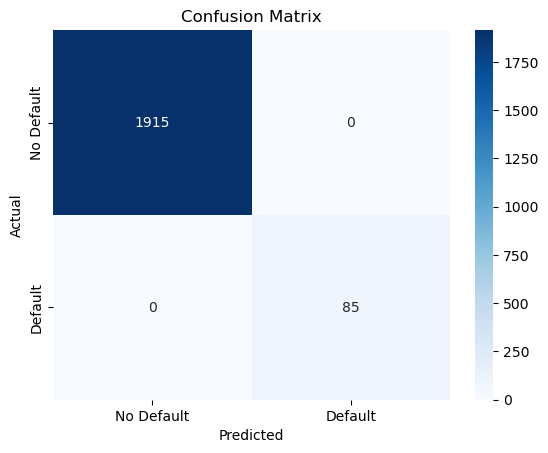

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier 
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

print(f"Best Parameters: {random_search.best_params_}")



Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': None}


In [19]:
df.to_csv('CreditRiskData.csv',index = 'False')